# Importing The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/MyDrive/DS Practice - Mohamed Ayman Mohamed  - 900182267/Case Studies/The Personality Analysis/marketing_campaign.csv'
df = pd.read_csv(path,sep="\t")

In [4]:
df_copy = df.copy()

In [5]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [6]:
df.shape

(2240, 29)

# 0 Defining the problem and understanding the Data

**The Problem**
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers. In this sense, we need to analyse the data to **solve such a problem**. More detailed, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment. In simple words, our **target** is **performing** clustering to summarize customer segments.



**The Data Attributes**

- Content
  - Attributes

    - People

      - ID: Customer's unique identifier
      - Year_Birth: Customer's birth year
      - Education: Customer's education level
      - Marital_Status: Customer's marital status
      - Income: Customer's yearly household income
      - Kidhome: Number of children in customer's household
      - Teenhome: Number of teenagers in customer's household
      -Dt_Customer: Date of customer's enrollment with the company
      - Recency: Number of days since customer's last purchase
      - Complain: 1 if the customer complained in the last 2 years, 0 otherwise
   -Products

     - MntWines: Amount spent on wine in last 2 years
     - MntFruits: Amount spent on fruits in last 2 years
     - MntMeatProducts: Amount spent on meat in last 2 years
     - MntFishProducts: Amount spent on fish in last 2 years
     - MntSweetProducts: Amount spent on sweets in last 2 years
     - MntGoldProds: Amount spent on gold in last 2 years

  - Promotion

    - NumDealsPurchases: Number of purchases made with a discount
    - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

 - Place

   - NumWebPurchases: Number of purchases made through the company’s website
   - NumCatalogPurchases: Number of purchases made using a catalogue
   - NumStorePurchases: Number of purchases made directly in stores
   - NumWebVisitsMonth: Number of visits to company’s website in the last month

<h4> Checking whether the data has missing values or not</h4>

In [7]:
print(df.isnull().sum()[df.columns[df.isnull().any()]])
print("Total Missing values : ",df.isna().sum().sum())

Income    24
dtype: int64
Total Missing values :  24


In [8]:
def ExploringTheData(df):
  # print("The Shape: ",df.shape)
  print("Simple Description of The Data: ", df.describe().T)
  print("The Number of Duplicate Data:",df.duplicated().sum())
  print("Check the Null values for each feature")
  print("Feature Name:      Value")
  print(df.isnull().sum())


In [9]:
ExploringTheData(df)

Simple Description of The Data:                        count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875  

In [10]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

ID: Number of unique values 2240
Year_Birth: Number of unique values 59
Education: Number of unique values 5
Marital_Status: Number of unique values 8
Income: Number of unique values 1974
Kidhome: Number of unique values 3
Teenhome: Number of unique values 3
Dt_Customer: Number of unique values 663
Recency: Number of unique values 100
MntWines: Number of unique values 776
MntFruits: Number of unique values 158
MntMeatProducts: Number of unique values 558
MntFishProducts: Number of unique values 182
MntSweetProducts: Number of unique values 177
MntGoldProds: Number of unique values 213
NumDealsPurchases: Number of unique values 15
NumWebPurchases: Number of unique values 15
NumCatalogPurchases: Number of unique values 14
NumStorePurchases: Number of unique values 14
NumWebVisitsMonth: Number of unique values 16
AcceptedCmp3: Number of unique values 2
AcceptedCmp4: Number of unique values 2
AcceptedCmp5: Number of unique values 2
AcceptedCmp1: Number of unique values 2
AcceptedCmp2: Numb

In [11]:
#Check the Values which has one unique value
columnsHavingOneValue = []
for column in df.columns:
  if(df[column].nunique() == 1):
    columnsHavingOneValue.append(column)
columnsHavingOneValue

['Z_CostContact', 'Z_Revenue']

<h4> From above, we need to do as follows: 
</h4>

- Deleting Z_CostContact and Z_Revenue, as it has one unique value.

- Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime.
-  There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later.



# 1.Cleaning the Data

## 1.1 Handling Missing Values

Since we are using clustering in this problem and the number of rows having missing values are 24 out of 2240, so I believe that there is no problem to delete them

In [12]:
#To remove the NA values
df = df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 2216


# 2.Preprocessing the Data and Feature Engineering

## 2.1 Deleting Unnecessary Features

In [13]:
df.drop('Z_CostContact',inplace = True, axis = 1)
df.drop('Z_Revenue',inplace = True, axis = 1)


## 2.2 Creating New Features

In [14]:
X = pd.to_datetime(df["Dt_Customer"])


In [15]:
dates = []
for i in X:
    i = i.date()
    dates.append(i) 

In [16]:
max(dates)

datetime.date(2014, 12, 6)

In [17]:
#Creating the number of days for each customer 

numberOfDays = []

for i in dates: 
  numberOfDays.append(max(dates) - i)

df['CustomerDays'] = numberOfDays

In [18]:
#Get the Age of each customer 
df["Age"] = 2022-df["Year_Birth"]


In [19]:
#How many children are in one home 

df["Children"]=df["Kidhome"]+df["Teenhome"]


In [20]:
#Calculating the total amount of spending all activities
# MntWines: Amount spent on wine in last 2 years
# MntFruits: Amount spent on fruits in last 2 years
# MntMeatProducts: Amount spent on meat in last 2 years
# MntFishProducts: Amount spent on fish in last 2 years
# MntSweetProducts: Amount spent on sweets in last 2 years
# MntGoldProds: Amount spent on gold in last 2 years


df['Spend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts']\
              + df['MntGoldProds']



In [21]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [22]:
 mp = {"Single" : 1 , "Together": 2 , "Married": 2, "Divorced" : 1 , "Widow": 1 , "Alone": 1,
        "YOLO":1, "Absurd":1
      } 

In [23]:
#Get the Family Size 

df["Family_Size"] = (df["Marital_Status"].replace(mp)).astype(int)+ df["Children"]

In [24]:
df['Marital_Status'] = df["Marital_Status"].replace(mp).astype(int)

In [25]:
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

<h4>Removing The features are not important</h4>

- Kidhome
- Teenhome
- Year_Birth
- ID (This one needs to be deleted because it does not add anything for any customer)

In [26]:
df = df.drop(['Year_Birth', 'ID', 'Dt_Customer'], axis=1)

## 2.3 Converting Categorical Features to Numerical

In [27]:
#Get list of categorical variables
s = (df.dtypes == 'object')
categorical_columns = list(s[s].index)

print("Categorical variables in the dataset:", categorical_columns)

Categorical variables in the dataset: ['Education']


In [28]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
for i in categorical_columns :
    df[i] = le.fit_transform(df[i])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Education            2216 non-null   int64          
 1   Marital_Status       2216 non-null   int64          
 2   Income               2216 non-null   float64        
 3   Kidhome              2216 non-null   int64          
 4   Teenhome             2216 non-null   int64          
 5   Recency              2216 non-null   int64          
 6   MntWines             2216 non-null   int64          
 7   MntFruits            2216 non-null   int64          
 8   MntMeatProducts      2216 non-null   int64          
 9   MntFishProducts      2216 non-null   int64          
 10  MntSweetProducts     2216 non-null   int64          
 11  MntGoldProds         2216 non-null   int64          
 12  NumDealsPurchases    2216 non-null   int64          
 13  NumWebPurchases   

## 2.4 Handling the Outliers

### 2.4.1 Removing any customer whose age greater than 90

In [30]:
df = df[df['Age']< 90]

### 2.4.2 Removing anyone whose income is grater than 500000

In [31]:
df['Income'].describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

In [32]:
df = df[df['Income'] < 500000]

In [33]:
df.shape

(2212, 30)

### 2.4.3 Using IQR to check the Outliers

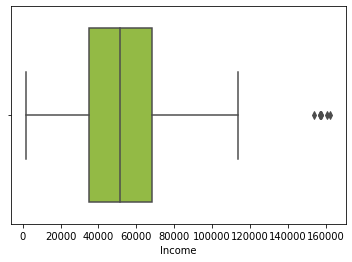

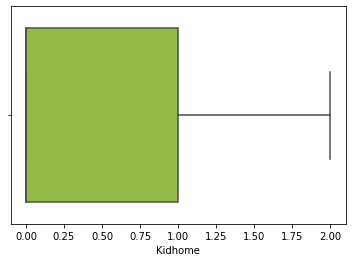

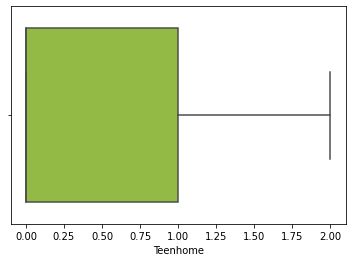

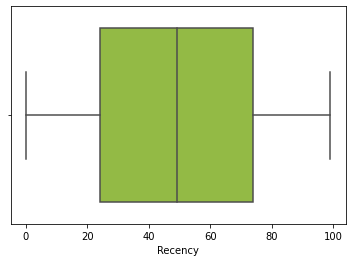

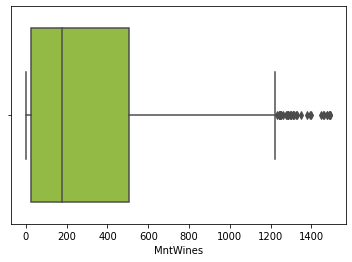

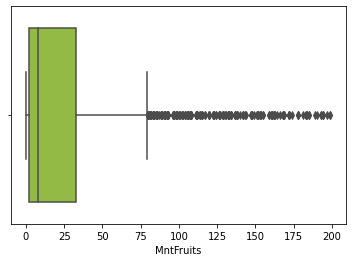

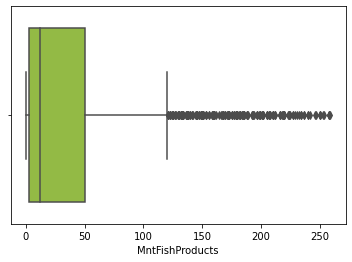

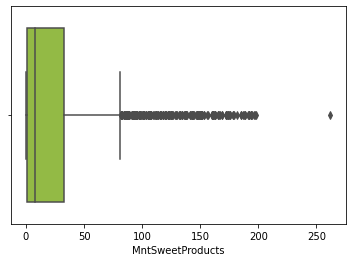

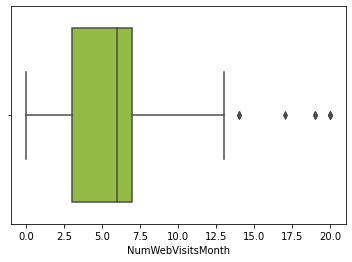

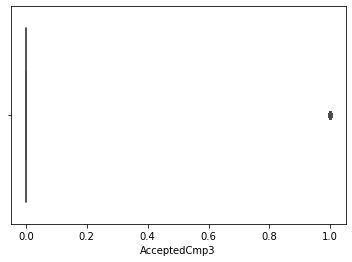

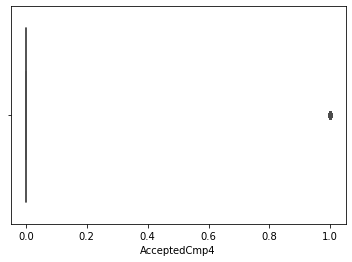

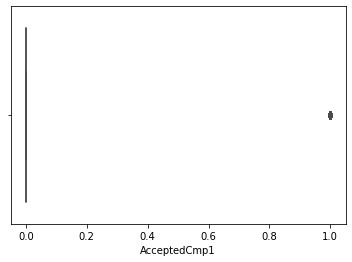

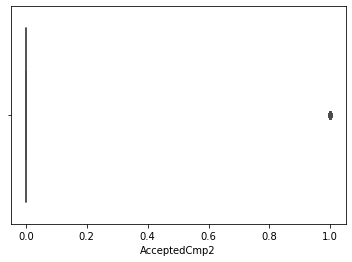

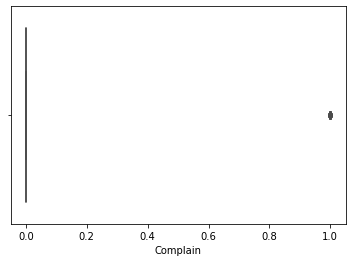

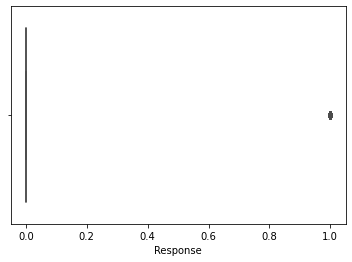

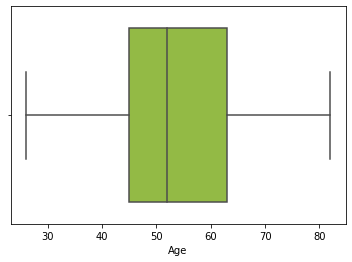

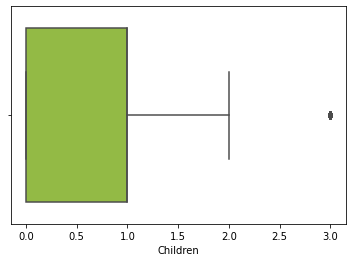

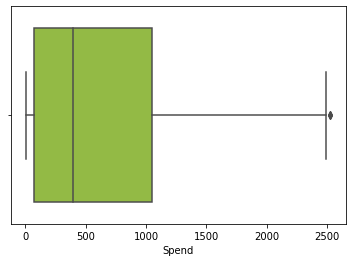

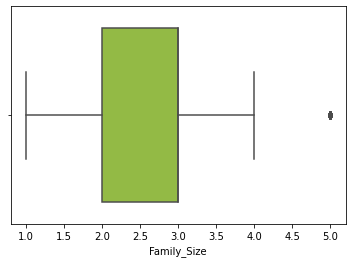

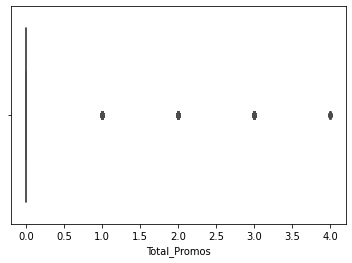

In [34]:
y = df.drop(['Education','Marital_Status', 'CustomerDays'],axis = 1)
for i in y.columns:
    sns.boxplot(x = i, data = y,color = 'yellowgreen')   
    plt.xlabel(i)
    plt.show()

In [35]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in df.columns:
    count_outliers(df,i)

There are outliers in Education
Count of outliers are: 198
No outliers in Marital_Status
There are outliers in Income
Count of outliers are: 7
No outliers in Kidhome
No outliers in Teenhome
No outliers in Recency
There are outliers in MntWines
Count of outliers are: 35
There are outliers in MntFruits
Count of outliers are: 245
There are outliers in MntMeatProducts
Count of outliers are: 173
There are outliers in MntFishProducts
Count of outliers are: 222
There are outliers in MntSweetProducts
Count of outliers are: 246
There are outliers in MntGoldProds
Count of outliers are: 204
There are outliers in NumDealsPurchases
Count of outliers are: 84
There are outliers in NumWebPurchases
Count of outliers are: 3
There are outliers in NumCatalogPurchases
Count of outliers are: 23
No outliers in NumStorePurchases
There are outliers in NumWebVisitsMonth
Count of outliers are: 8
There are outliers in AcceptedCmp3
Count of outliers are: 163
There are outliers in AcceptedCmp4
Count of outliers are

I guess that IQR cannot be trusted to remove outliers. In this sense, let's check Outliers using LOF

### 2.4.4 Using LOF

In [36]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'CustomerDays', 'Age', 'Children', 'Spend',
       'Family_Size', 'Total_Promos'],
      dtype='object')

In [37]:
from sklearn.neighbors import LocalOutlierFactor
colsMahal = ['Education', 'Marital_Status', 'Total_Promos', 'Spend', 'Children', 'Age', 'Family_Size']
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(df[colsMahal])

X_scores = clf.negative_outlier_factor_

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]
df_inlier = df[in_mask]
df_outlier = df[out_mask]
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

In [38]:
df_removed = df.copy()
x = np.percentile(radius, 99)
x
df_removed['radius'] = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
df_removed[df_removed['radius'] > 0.95]

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  \
1179          3               1  90638.0        0         0       29   
1492          2               2  87679.0        0         0       62   
1572          3               1  90638.0        0         0       29   

      MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
1179      1156        120              915               94  ...   
1492      1259        172              815               97  ...   
1572      1156        120              915               94  ...   

      AcceptedCmp2  Complain  Response  CustomerDays  Age  Children  Spend  \
1179             0         0         0      296 days   31         0   2525   
1492             0         0         1      497 days   34         0   2524   
1572             0         0         1      296 days   31         0   2525   

      Family_Size  Total_Promos    radius  
1179            1             1  1.000000  
1492            2             3  0.994592  
1572            1             1  1.000000  

[3 rows x 31 columns]

In [39]:
df_removed = df_removed[df_removed['radius'] < 0.95]

## 2.5 Data Scaling

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()
scaler.fit(df_removed)
df_scaled = scaler.transform(df_removed)

# 3.Data Visualization

## 2.1General visualization to the whole data

In [ ]:
!pip3 install dataprep


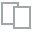
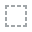
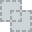
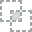
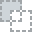
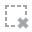
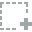
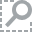
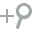
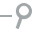
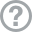
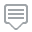
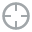
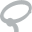
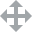
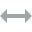
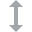
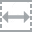
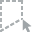
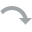
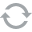
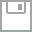
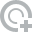
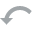
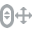
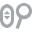
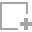
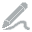
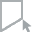
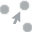
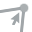
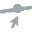

In [40]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing

plot(df_copy)

From Visualization above, we can clearly see that the 
- data is somehow skewed
- The majority of people are just graduated. 
- The minority of people having a very high income. 
- The majority of people are married.
- There is no need for features Z_Revenue and Z_CostContact ( This is why we deleted it in section 2)


<h4> Going Deeper to understand the Data</h4> 

In [41]:
!pip3 install arcticdata

The feature Education is CATEGORICAL

-Cardinality: 5
-Missing values in training set: 0


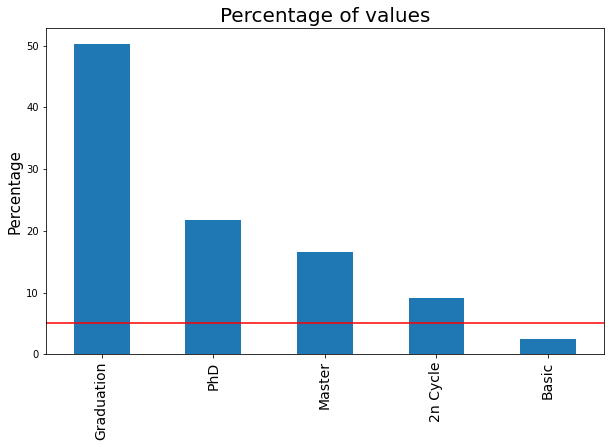

In [42]:
import arcticdata.ExploratoryDataAnalysis as eda
eda.feature_analysis(df_copy,'Education')

In [43]:
numeric_Cols = ['Income', 'MntWines', 'MntFruits',
                   'MntMeatProducts',  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth']

In [44]:
def make_distplot(df, col, ax):
    sns.distplot(df[col], ax = ax)
    ax.axvline(df[col].mean(), linestyle = '--', color = "red")
    ax.axvline(df[col].median(), linestyle = '--', color = "green")

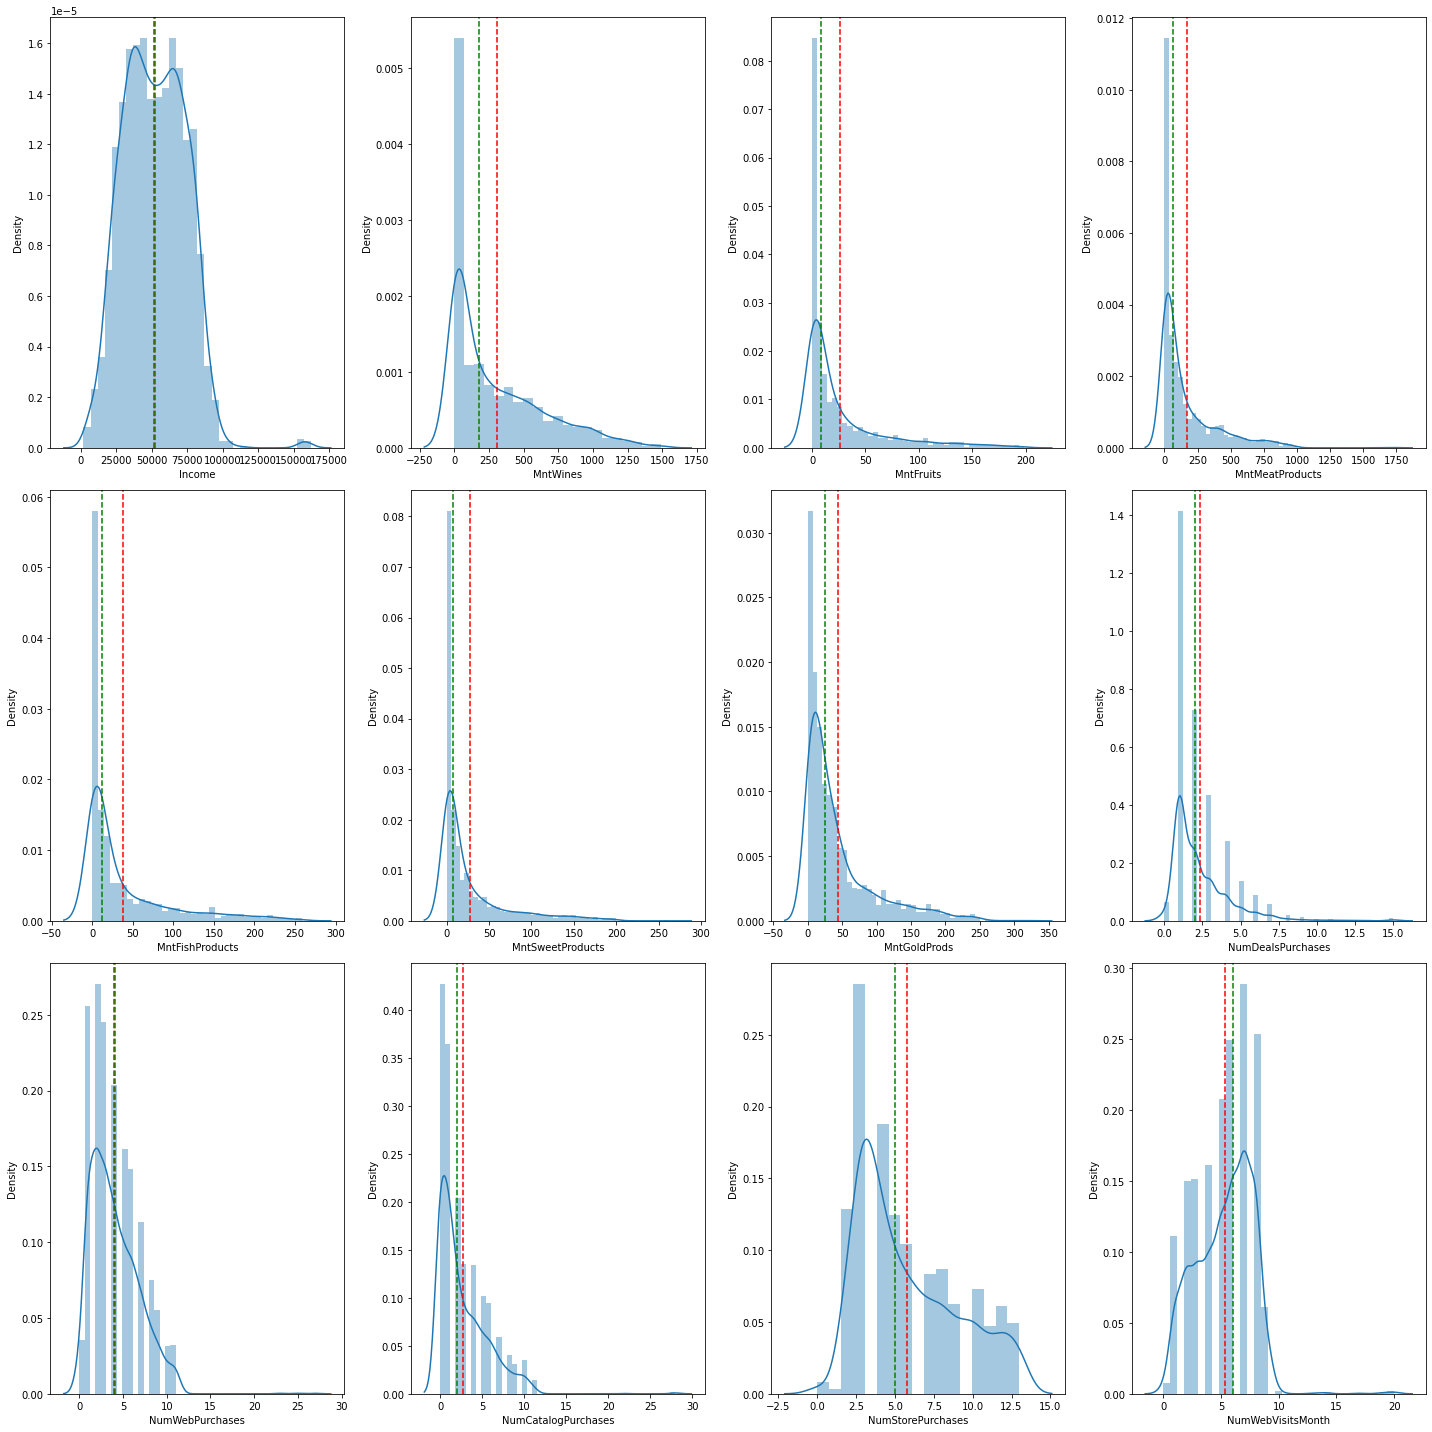

In [45]:

fig, ax = plt.subplots(3,4, figsize = (20,20))

ax = np.ravel(ax)
for i in range(len(numeric_Cols)):
    make_distplot(df, numeric_Cols[i], ax[i])
for i in range(len(numeric_Cols), 3*4):
    ax[i].axis("off")
ax = np.reshape(ax, (3, 4))
plt.tight_layout()


**Conclusion:**
- We can see that the 'Income' column has mean and almost simular median values unlike to 'mntwines' and 'mntfruits' values. This distribution has many peaks close together, the top of the distribution resembles a plateau. In average, income value is about 50 000, but some persons earn more. Hist with 'mntwines' and 'mntfruits' data are Right-skewed.

- Most columns contain Right-skewed distribution except the last one.
- From the graphs, we can easily notice that customers buy on web.
- The number of web visits is about 5 in average.


- From the graphs above, we can ask ourselves, **"what is a dynamic of purchases and the amount of money spent?"**


No handles with labels found to put in legend.


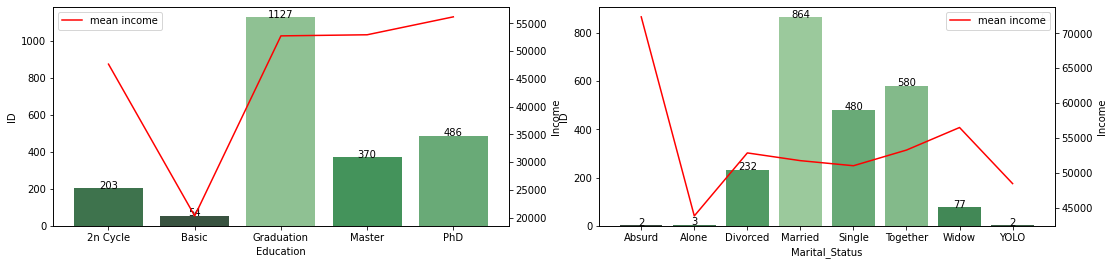

In [46]:
def dist_custom(dataset, columns_list, rows, cols, suptitle, size=(16,8), y=0.92, inc=False):
    fig, axs = plt.subplots(rows, cols,figsize=size)
    fig.suptitle(suptitle,y=y, size=16)
    fig.tight_layout(pad=6.0)
    axs = axs.flatten() 
    
    for i, data in enumerate(columns_list):
        df_c = dataset.groupby(data).count().reset_index()
        pal = sns.color_palette("Greens_d", len(df_c))
        rank = df_c['ID'].argsort().argsort() 
        
        g=sns.barplot(df_c[data], df_c['ID'], ax=axs[i], palette=np.array(pal[::-1])[rank])
        plt.legend()
        for index, row in df_c.iterrows():
            g.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
            
        if inc == True:
            axs[i].tick_params(axis='y')
            df_c = dataset.groupby(data)['Income'].mean().reset_index()
            axs[i] = axs[i].twinx()
            sns.lineplot(df_c[data], df_c['Income'], ax=axs[i], color='red', label='mean income')
            axs[i].tick_params(axis='y')
        
        
dist_custom(dataset=df_copy, columns_list=['Education', 'Marital_Status'], 
            rows=1, cols=2, suptitle='',
            size=(16,5), y=0.83, inc=True)

**Conclusion:**
- From the plot above we can see that customers with Master and PhD degrees have the highest income in comparison to others education types. Clients with 'Basic' education don't earn a lot in average.

- Alone people have the lowest income.


In [47]:
obj = ['Education','Marital_Status']


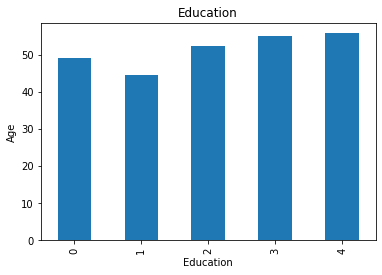

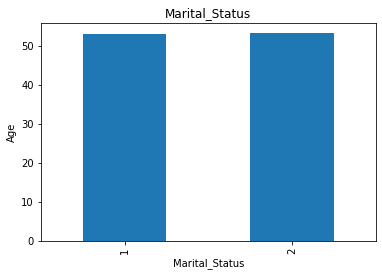

In [48]:
for i in obj:
    data=df.copy()
    data.groupby(i)['Age'].mean().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Age')
    plt.title(i)
    plt.show()

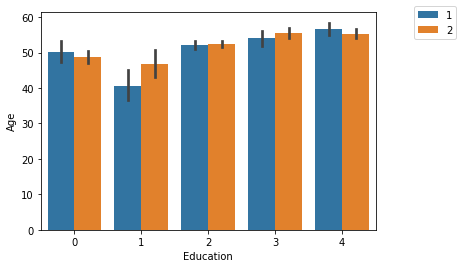

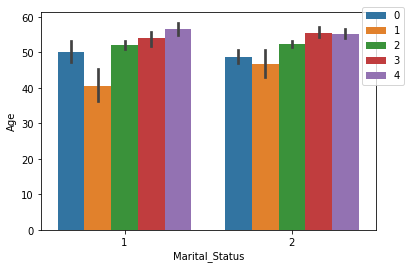

In [49]:

for i in range(len(obj)):
    for j in range(2):
        x = obj[i]
        if obj[j] != x:
            sns.barplot(x= x,y='Age',hue=obj[j],data=df)
            plt.legend(bbox_to_anchor=(1.1, 1.05))
            plt.show()
    

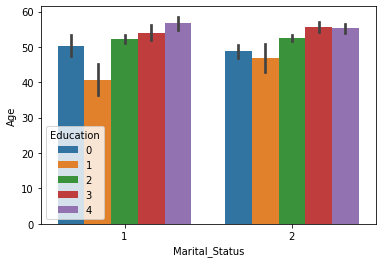

In [50]:
for i in range(len(obj)):
    x='Marital_Status'
    for j in range(1):
        if obj[i] != x:
            sns.barplot(x= x,y='Age',hue=obj[i],data=df)
            sns.set(rc={'figure.figsize':(11,12)})
            plt.show()

**Conclusion**
-  average age is above 50 for people doing masters,PhD,Graduation
-  average age of basic is less than all other features below 50
-  average age of wiodows are high above 60
- average age of absurd yolo single and alone below 50

## 2.2 Correlation

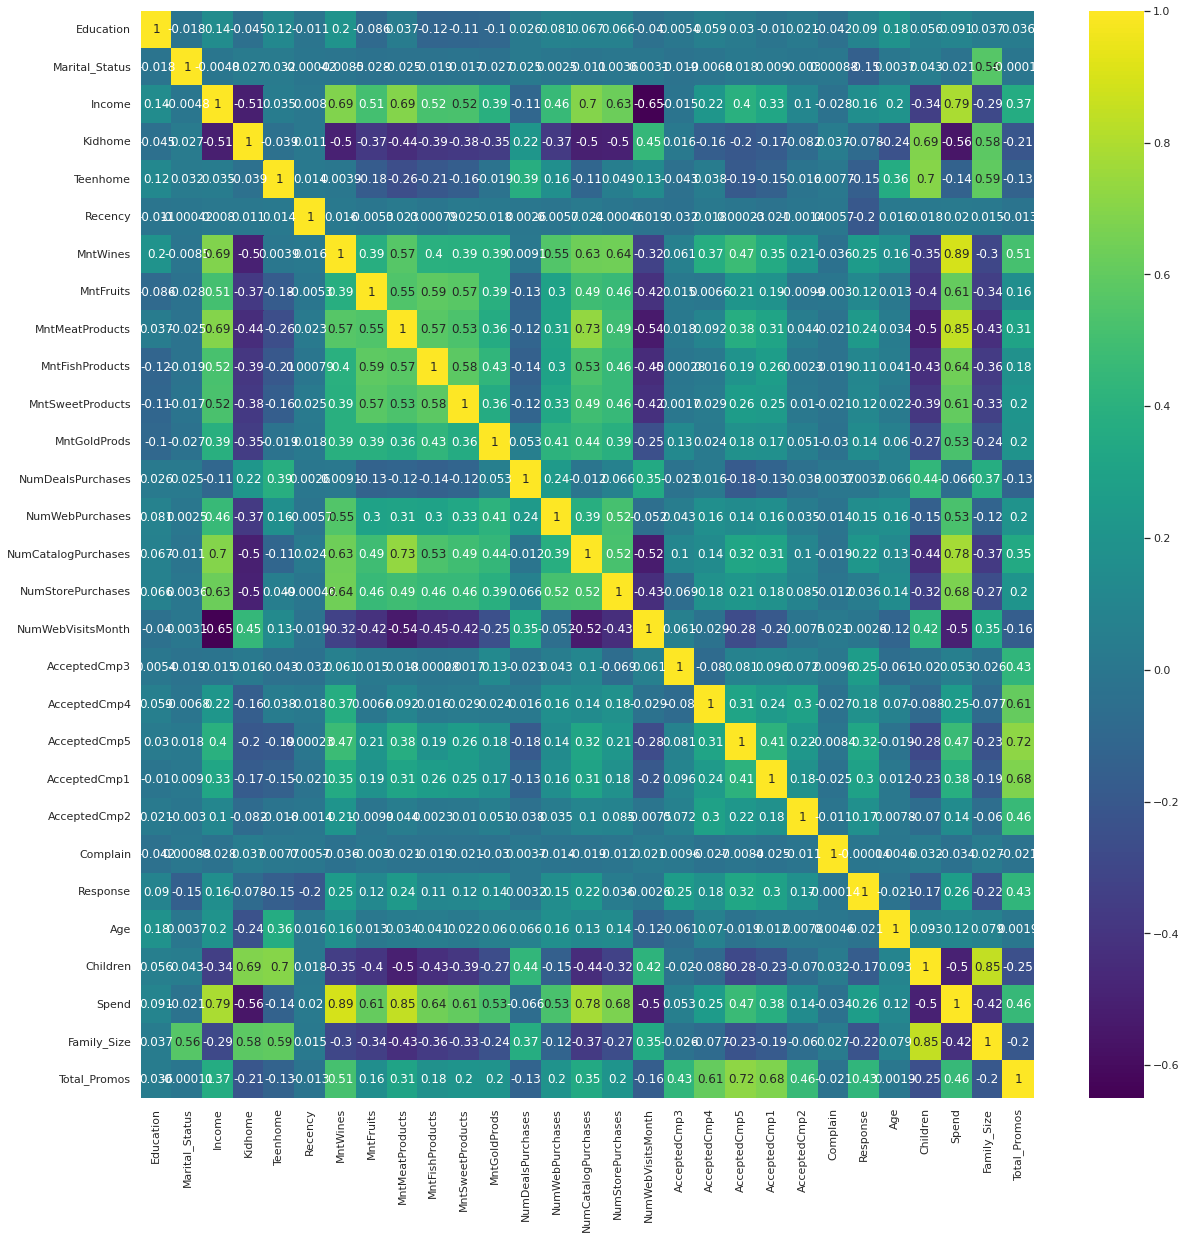

In [51]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(df.corr(),annot = True,cmap = 'viridis')
plt.show()

We can notice that there is correlation between features. It would be helpful for clustering to give higher weights for each customer.

# 4.Dimensionality Reduction

In [52]:
df_removed.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'CustomerDays', 'Age', 'Children', 'Spend',
       'Family_Size', 'Total_Promos', 'radius'],
      dtype='object')

In [53]:
df_removed['CustomerDays'] = df_removed['CustomerDays']/ np.timedelta64(1, 'D')

In [54]:
from sklearn.decomposition import PCA

cols_del = ['AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'radius']
df_c = df_removed.drop(cols_del, axis=1)
scaler = StandardScaler()
scaler.fit(df_c)
df_s = pd.DataFrame(scaler.transform(df_c),columns= df_c.columns )

#2. Reducing dimentions to 3 with the PCA usage
pca = PCA(n_components=3)
pca.fit(df_s)
df_pca = pd.DataFrame(pca.transform(df_s), columns=(["f1","f2", "f3"]))
df_pca.describe().T



count          mean       std       min       25%       50%       75%  \
f1  2209.0 -3.176374e-17  2.824012 -5.852248 -2.513171 -0.768096  2.402222   
f2  2209.0 -1.511793e-16  1.642828 -3.932626 -1.314276 -0.128843  1.171424   
f3  2209.0 -7.468499e-17  1.248852 -4.012228 -0.853584  0.004146  0.810325   

         max  
f1  7.415524  
f2  6.499025  
f3  5.597061

The result after permorming steps from 1 to 3


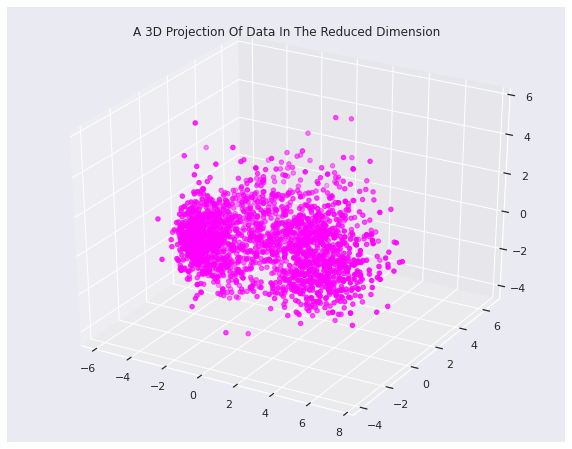

In [55]:

print('The result after permorming steps from 1 to 3')

#Ploting result data with the use of scatterplot. plotly
x =df_pca["f1"]
y =df_pca["f2"]
z =df_pca["f3"]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="magenta", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# 5.Clustering

In [65]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer

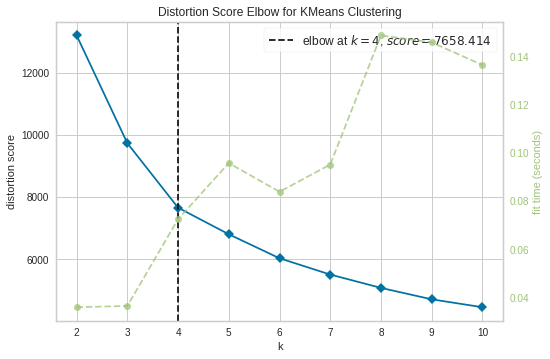

In [57]:
# 4. Performing Elbow Method
plt_elb = KElbowVisualizer(KMeans(), k=10)
plt_elb.fit(df_pca)
plt_elb.show();

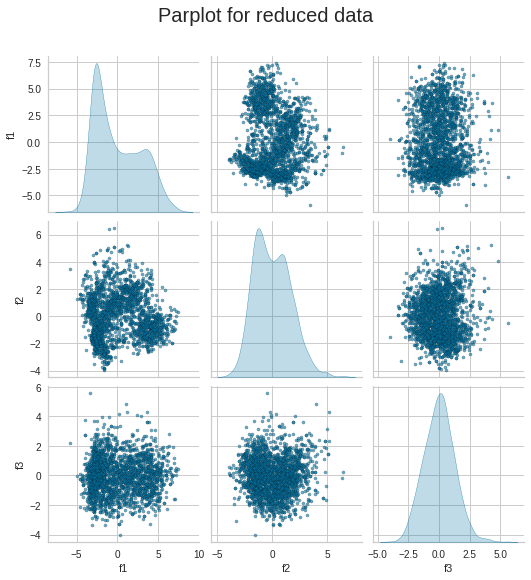

In [58]:
g = sns.pairplot(df_pca, diag_kind="kde",
                 plot_kws = {'alpha': 0.6, 's': 10, 'edgecolor': 'k'})
g.fig.suptitle('Parplot for reduced data', 
             size = 20, y=1.07);

## 5.1 Kmeans

### 5.1.1 With PCA

In [59]:
Kmeans = KMeans(n_clusters = 4)
Kmeans_df = Kmeans.fit_predict(df_pca)

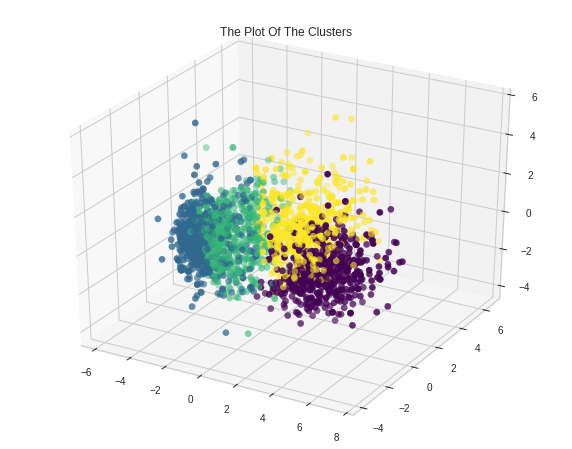

In [60]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=Kmeans_df, marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()


In [61]:
silhouette_score(df_pca,Kmeans.labels_, metric='euclidean', sample_size=None, random_state=None)

0.35495589335458294

In [62]:
#Visualizing the results for evaluation

#Plotting countplot of clusters
pl = sns.countplot(x=Kmeans.labels_)
pl.set_title("Distribution Of The Clusters")
plt.show()

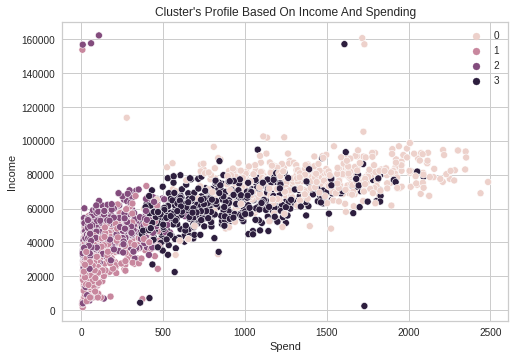

In [63]:
pl = sns.scatterplot(data = df_removed,x=df_removed["Spend"], y=df_removed["Income"],hue=Kmeans.labels_)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

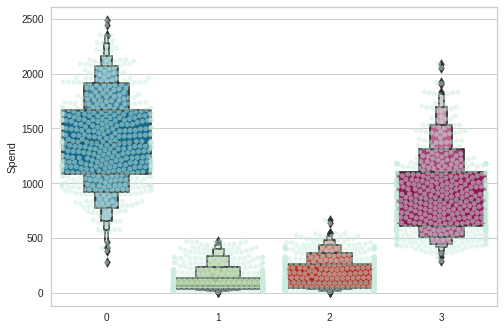

In [64]:
plt.figure()
pl=sns.swarmplot(x=Kmeans.labels_, y=df_removed["Spend"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=Kmeans.labels_, y=df_removed["Spend"])
plt.show()

- We can see that The customers who are in the cluster 0 has many income and spending a lot of money, while cluster 1 and 2 have very low money and spending little time. 

### 5.1.2 Without PCA

In [70]:
Kmeans = KMeans(n_clusters = 4)
Kmeans_df = Kmeans.fit_predict(df_removed)

In [86]:
silhouette_score(df_removed,Kmeans.labels_, metric='euclidean', sample_size=None, random_state=None)

0.5276745581576145

## 5.2 Agglomerative Clustering

### 5.2.1 With PCA

In [66]:
AC = AgglomerativeClustering(n_clusters=4)
AC_df = AC.fit_predict(df_pca)

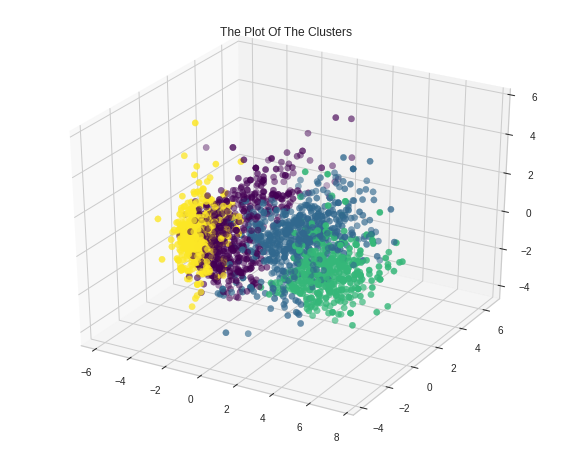

In [67]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=AC_df, marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()


In [69]:
silhouette_score(df_pca,AC.labels_, metric='euclidean', sample_size=None, random_state=None)

0.2980736417792089

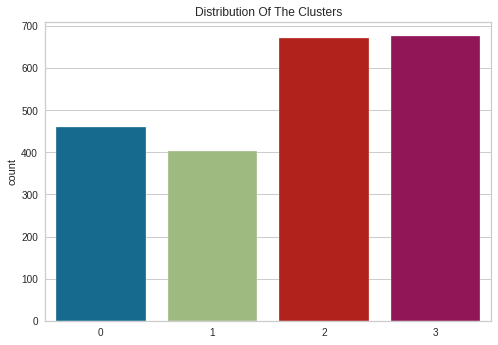

In [74]:
#Visualizing the results for evaluation

#Plotting countplot of clusters
pl = sns.countplot(x=Kmeans.labels_)
pl.set_title("Distribution Of The Clusters")
plt.show()

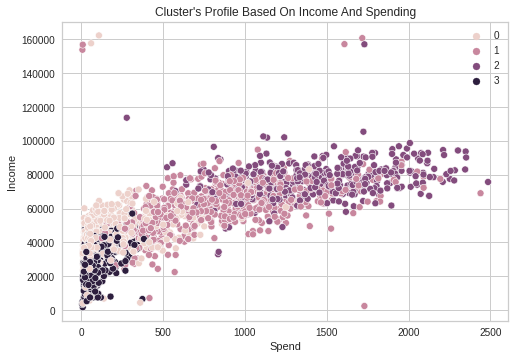

In [72]:
pl = sns.scatterplot(data = df_removed,x=df_removed["Spend"], y=df_removed["Income"],hue=AC.labels_)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

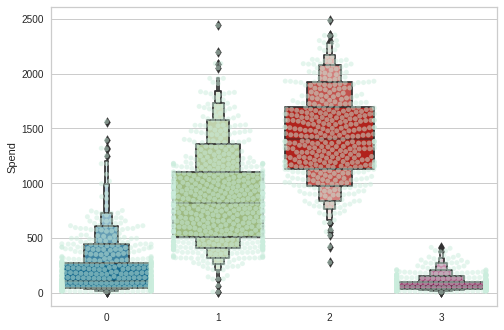

In [73]:
plt.figure()
pl=sns.swarmplot(x=AC.labels_, y=df_removed["Spend"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=AC.labels_, y=df_removed["Spend"])
plt.show()

- This clustering algorithm shows that 2 is spending the most with having the highest income

### 5.2.2 Without PCA

In [84]:
AC = AgglomerativeClustering(n_clusters=4)
AC_df = AC.fit_predict(df_removed)

In [97]:
silhouette_score(df_removed,AC.labels_, metric='euclidean', sample_size=None, random_state=None)

0.5106449240850297

## 5.3 DBSCAN

### 5.3.1 With PCA 

In [87]:
from sklearn.cluster import DBSCAN

DB = DBSCAN(eps=0.30, min_samples=9)

DB_df = DB.fit_predict(df_pca)

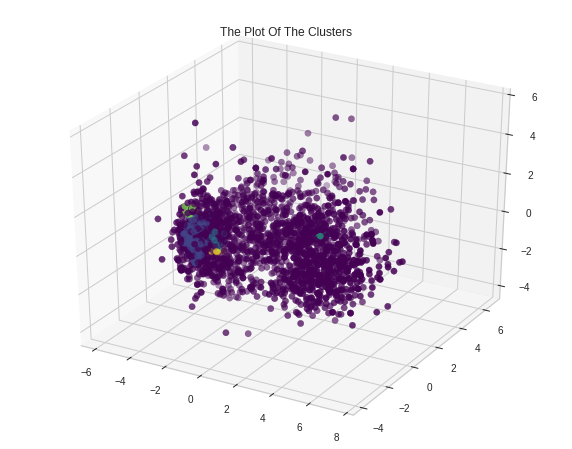

In [88]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=DB_df, marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()


In [89]:
silhouette_score(df_pca,DB.labels_, metric='euclidean', sample_size=None, random_state=None)

-0.39325444305822715

It is apparent that the score is very bad, so we cannot depend on DBSCAN

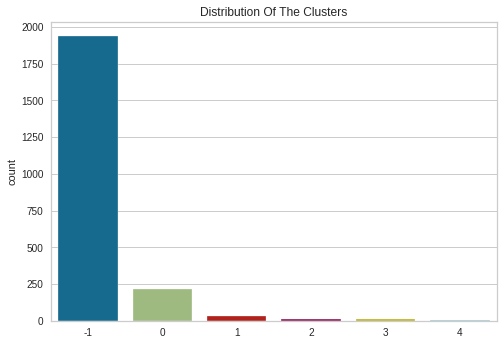

In [90]:
#Visualizing the results for evaluation

#Plotting countplot of clusters
pl = sns.countplot(x=DB.labels_)
pl.set_title("Distribution Of The Clusters")
plt.show()

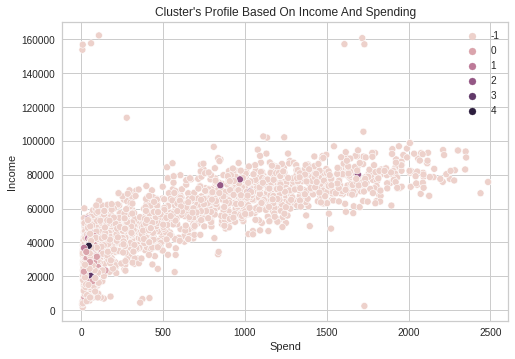

In [91]:
pl = sns.scatterplot(data = df_removed,x=df_removed["Spend"], y=df_removed["Income"],hue=DB.labels_)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

### 5.3.2 Without PCA

In [93]:
DB = DBSCAN(eps=0.30, min_samples=9)

DB_df = DB.fit_predict(df_pca)

In [95]:
silhouette_score(df_scaled,DB.labels_, metric='euclidean', sample_size=None, random_state=None)

-0.1966265847488105

## 5.4 Affinity propagation

### 5.4.1 With PCA

In [103]:
from sklearn.cluster import AffinityPropagation
AP = AffinityPropagation(damping=0.8)
AP_df = AP.fit_predict(df_pca)

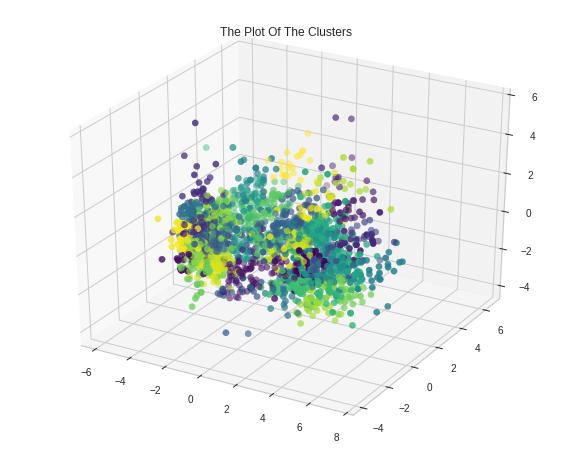

In [104]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=AP_df, marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()


In [105]:
silhouette_score(df_pca,AP.labels_, metric='euclidean', sample_size=None, random_state=None)

0.24288321430446538

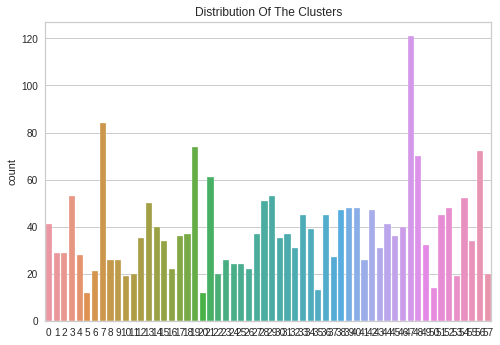

In [106]:
#Visualizing the results for evaluation
pl = sns.countplot(x=AP.labels_)
pl.set_title("Distribution Of The Clusters")
plt.show()

### 5.4.2 Without PCA

In [107]:
AP = AffinityPropagation(damping=0.9)
AP_df = AP.fit_predict(df_pca)
silhouette_score(df_pca,AP.labels_, metric='euclidean', sample_size=None, random_state=None)

0.24100433649990474

- We can see that there is no difference. We cannot rely on it so much.